In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

from tqdm import tqdm
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt

# 데이터 불러오기

In [2]:
df = pd.read_csv('./movie/all/naver_movie_review_1111_comedy.csv')
df

,title,link,score,review
0,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,일단 진선규님께 박수갈채도 부족함 진짜 연기를 다양하게 잘하셔서 놀랐어요 오랜만에 ...
1,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,8,류승룡 드디어 심폐소생술 성공!
2,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,진짜 뻥안치고 ㅈㄴ 웃겼다
3,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,"계속 웃으면서 봤어요!""지금까지 이런맛은 없었다이것은 갈비인가 통닭인가수원왕갈비통닭..."
4,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,지금까지 이런 영화는 없었다 이것은 영화인가 통닭광고인가
...,...,...,...,...
74170,19곰 테드,https://movie.naver.com/movie/bi/mi/pointWrite...,1,장르불명OOO기영화
74171,19곰 테드,https://movie.naver.com/movie/bi/mi/pointWrite...,10,ㅋㅋㅋㅋㅋ곰돌이가 즈질인데 너무 귀엽게 생겼음 ㅋㅋ 병맛느낌 나게 재미있음 ㅋㅋㅋ
74172,19곰 테드,https://movie.naver.com/movie/bi/mi/pointWrite...,1,재밌어보여서 봤는데 보고나니 왜 평점이 낮은지 알겠다. 한번도 안웃었다. 감동도 재...
74173,19곰 테드,https://movie.naver.com/movie/bi/mi/pointWrite...,1,어른들을 위한 1동화..


In [3]:
review = pd.DataFrame(df['review'])
review

,review
0,일단 진선규님께 박수갈채도 부족함 진짜 연기를 다양하게 잘하셔서 놀랐어요 오랜만에 ...
1,류승룡 드디어 심폐소생술 성공!
2,진짜 뻥안치고 ㅈㄴ 웃겼다
3,"계속 웃으면서 봤어요!""지금까지 이런맛은 없었다이것은 갈비인가 통닭인가수원왕갈비통닭..."
4,지금까지 이런 영화는 없었다 이것은 영화인가 통닭광고인가
...,...
74170,장르불명OOO기영화
74171,ㅋㅋㅋㅋㅋ곰돌이가 즈질인데 너무 귀엽게 생겼음 ㅋㅋ 병맛느낌 나게 재미있음 ㅋㅋㅋ
74172,재밌어보여서 봤는데 보고나니 왜 평점이 낮은지 알겠다. 한번도 안웃었다. 감동도 재...
74173,어른들을 위한 1동화..


In [4]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74175 entries, 0 to 74174
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  73998 non-null  object
dtypes: object(1)
memory usage: 579.6+ KB


In [5]:
review.isnull().values.any()

True

# 특수문자 제거

In [6]:
# 'ㅋㅋㅋㅋ', 'ㅠㅠ' 같은 단어 포함시키지 않기 위해 "가-힣" 만 남기고 나머지 제거
#review['review'] = review['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
review['review'] = review['review'].str.replace("[^가-힣 ]","")
review.head()

,review
0,일단 진선규님께 박수갈채도 부족함 진짜 연기를 다양하게 잘하셔서 놀랐어요 오랜만에 ...
1,류승룡 드디어 심폐소생술 성공
2,진짜 뻥안치고 웃겼다
3,계속 웃으면서 봤어요지금까지 이런맛은 없었다이것은 갈비인가 통닭인가수원왕갈비통닭입니...
4,지금까지 이런 영화는 없었다 이것은 영화인가 통닭광고인가


In [7]:
review.isnull().values.any()

True

In [8]:
review.loc[review.review.isnull()].head()

,review
428,NaN
786,NaN
1137,NaN
2163,NaN
2581,NaN


In [9]:
len(review.loc[review.review.isnull()])

177

In [10]:
review = review.dropna(how = 'any')
review.isnull().values.any()

False

In [11]:
len(review)

73998

# 불용어 정의 & tokenize

In [12]:
# 한 번 정의 후 두번 정의하지 않는다
okt = Okt()

In [51]:
# 불용어 list
# stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '보다', '영화', '재밌다', '너무', '진짜', '좋다', '이다', '있다', '없다', '정말', '까지', '나오다', '같다', '않다', '그냥', '아니다', '가다', '오랜', '처음', '자다', '보고', '최고', '부터', '에서', '넘다', '되다', '오다', '재다', '간만', '많이', '보기', '정도', '완전', '계속', '듣다', '사람', '하고', '아무', '모르다', '역시', '이렇다', '그렇다', '싶다', '내내', '많다', '만들다', '중간', '끝나다', '이렇게', '인가', '주다', '이랑', '하나', '맞다', '한번', '기분', '부분', '영화관', '지금', '느낌', '알다', '같이', '수준', '먹다', '나다', '인데', '재밋', '알바', '이런', '조금', '제일', '괜찮다', '차다', '빠지다', '분들', '크다', '잇다', '쏘다', '그래도', '다시', '이상', '끼리', '모두', '아주', '극장', '보고오다', '갈비', '근데', '이건', '높다', '그리고', '에요', '극한', '요즘', '다른', '해주다', '최근', '함께', '때문', '작품', '안되다', '부담', '라고', '받다', '이나', '약간', '개인', '동안', '크게', '가장', '나름', '오늘', '쓰다', '이네', '첨부', '에는', '하지만', '오랫', '드리다', '말다', '관람', '모든', '이라', '메다', '이영화', '이고', '특히', '굳다', '빼다', '늘다', '제대로', '보이다', '인지', '영화로', '지만', '그렇게', '어떻다', '만이', '지다', '이에요', '만에', '써다', '남다', '남기다', '이라는', '되어다', '유해진', '진선규', '한국', '류승룡', '한국영', '이준', '치킨', '배꼽', '이하늬', '럭키', '통닭', '조윤희', '이병헌', '신하균']

In [52]:
# review data 토큰화
review_token = []
for sentence in tqdm(review['review']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    review_token.append(stopwords_removed_sentence)

100%|███████████████████████████████████████████████████████████████████████████| 73998/73998 [02:55<00:00, 421.73it/s]


In [53]:
print(review_token[:5])

[['일단', '님', '께', '박수갈채', '부족함', '연기', '다양하다', '놀라다', '만', '없이', '코미디', '즐겁다', '조조', '로', '할인', '고', '제', '값', '만족하다', '습', '니당다', '밤새다', '없이', '웃기다', '힘'], ['드디어', '심폐소생술', '성공'], ['뻥', '안치', '고', '웃기다'], ['웃다', '맛', '수원', '왕', '대사', '귓가', '맴', '네', '요'], ['것', '광고']]


# flatten & word list 생성

In [54]:
# 다차원 list를 1차원으로 변경 함수
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

In [55]:
review_wordlist = flatten(review_token)
print(review_wordlist)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [56]:
len(review_wordlist)

481727

# 문자 빈도수 계산

In [57]:
review_wordlist = pd.Series([x for x in review_wordlist if len(x)>1])
pd.DataFrame(review_wordlist)

,0
0,일단
1,박수갈채
2,부족함
3,연기
4,다양하다
...,...
327127,유치하다
327128,웃기다
327129,뭐임
327130,중딩


In [58]:
len(review_wordlist)

327132

In [59]:
# 상위 몇 개의 단어를 추출할 것인지 정의
word_num = 100

In [60]:
review_wordlist_count = review_wordlist.value_counts().head(word_num)
pd.DataFrame(review_wordlist_count)

,0
웃다,14933
웃기다,9050
재미있다,7119
연기,5564
생각,4890
...,...
감사하다,388
죽다,382
버리다,381
짜다,378


In [61]:
pd.DataFrame(review_wordlist_count).to_csv('./comedy_wordlist_4.csv', encoding='euckr')

In [62]:
# 막대 그래프 (bar-chart)
from matplotlib import rcParams, style
style.use('ggplot')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)
plt.rcParams['figure.figsize'] = (15, 10)

<AxesSubplot:>

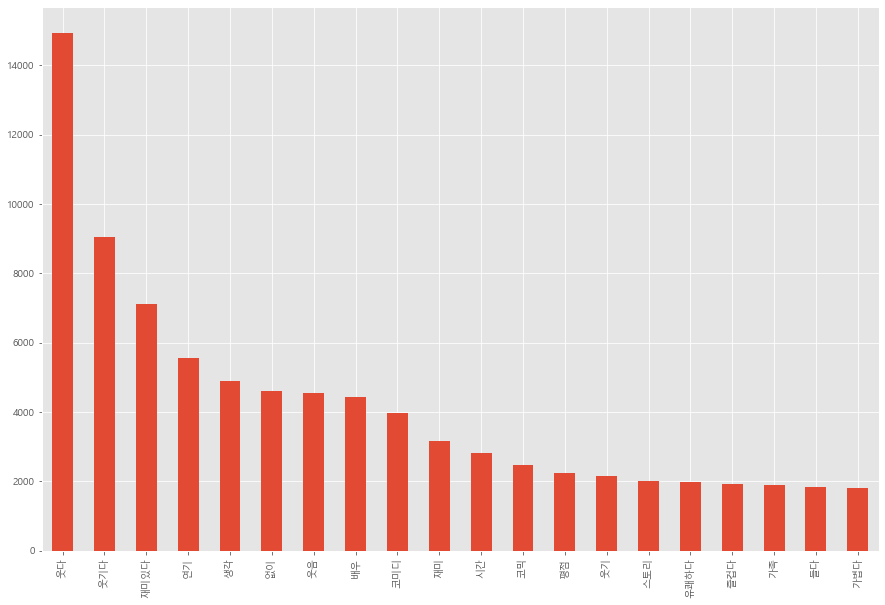

In [63]:
review_wordlist_count[0:20].plot.bar()

# 워드클라우드 생성

In [64]:
# 사용할 폰트 저장 경로 확인必
font_path = "c:/windows/fonts/malgun.ttf"
wordcloud = WordCloud(font_path = font_path, width = 800, height = 800, background_color = 'white')

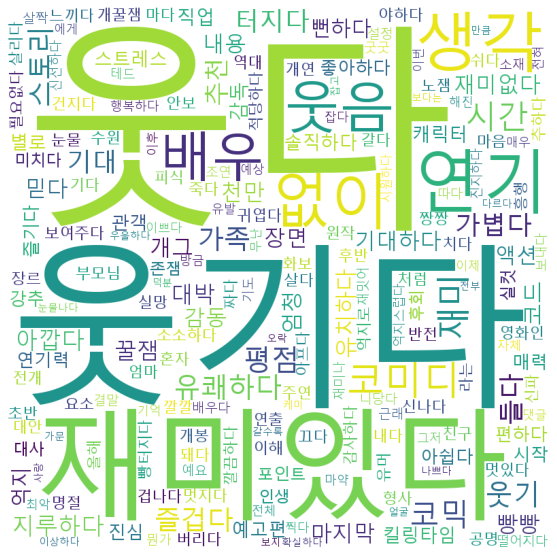

In [68]:
# 한글 워드크라우드
count_kor = Counter(review_wordlist)
wordcloud_kor = wordcloud.generate_from_frequencies(count_kor)
fig_kor = plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig('comedy_wordcloud')